In [7]:
# Loading the yfinance API, to extract data from Yahoo Finance about Reliance Worldwide Corporation (RWC) and the ASX200 index.
# The data is downloaded for the period from January 1, 2016, to October 1, 2024.
import yfinance as yf
RWC = yf.download(tickers='RWC.AX', start='2016-01-01', end='2025-04-25')
print(RWC)

ASX200 = yf.download(tickers='^AXJO', start='2016-01-01', end='2025-04-25')
print(ASX200)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker        RWC.AX    RWC.AX    RWC.AX    RWC.AX    RWC.AX
Date                                                        
2016-04-29  2.347022  2.370890  2.259506  2.283374  83500275
2016-05-02  2.378846  2.394759  2.323154  2.331111  17301736
2016-05-03  2.347022  2.386803  2.339067  2.378846   5060586
2016-05-04  2.323155  2.339067  2.275419  2.323155   4402582
2016-05-05  2.275419  2.331111  2.275419  2.331111   5472662
...              ...       ...       ...       ...       ...
2025-04-16  3.830000  3.950000  3.830000  3.940000   1832174
2025-04-17  3.930000  3.940000  3.810000  3.820000   1119353
2025-04-22  3.840000  3.885000  3.790000  3.860000   1513718
2025-04-23  3.990000  4.010000  3.830000  3.920000   2942436
2025-04-24  4.030000  4.040000  3.980000  4.010000   1002346

[2275 rows x 5 columns]
Price             Close         High          Low         Open   Volume
Ticker            ^AXJO        ^AXJO        ^AXJO

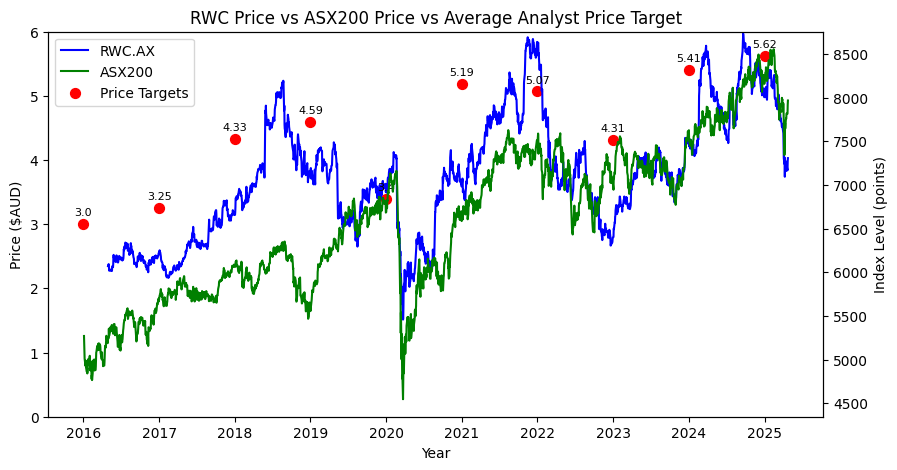

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV file of Historical Price Targets of RWC extracted from Bloomberg
price_targets = pd.read_csv("price_targets_converted.csv")
price_targets.columns = ['Year', 'Price Target'] 
price_targets['Year'] = pd.to_datetime(price_targets['Year'], format='%Y')

fig, ax1 = plt.subplots(figsize=(10, 5))

# Using the extracted data from the yfinance API, the RWC.AX close prices are plotted 
rwc_line = ax1.plot(RWC['Close'], label='RWC Price', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($AUD)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
# Using the extracted data from the yfinance API, the ASX200 close prices are plotted
asx200_line = ax2.plot(ASX200['Close'], label='ASX200 Price', color='green')
ax2.set_ylabel('Index Level (points)')
ax2.tick_params(axis='y')

# Using the extracted data from the CSV file, the price targets are plotted
#As the 2016 price target is not in the original data, it is added manually to the DataFrame
new__row = pd.DataFrame({'Year': [pd.Timestamp('2016')], 'Price Target': [3.00]})
price_targets = pd.concat([price_targets, new__row], ignore_index=True).sort_values(by='Year')

price_target_dots = ax1.scatter(price_targets['Year'], price_targets['Price Target'], 
                             label='Average Analyst Price Target', color='red', marker='o', s=50)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($AUD)')
ax1.tick_params(axis='y')
ax1.set_ylim(0,6)

# Label the Price Target points accordingly
for x,y in zip(price_targets['Year'], price_targets['Price Target']):
    ax1.annotate(f'{y}', xy=(x, y), textcoords="offset points", xytext=(0,6),
                ha='center', fontsize=8, color='black')

# Label the lines and create a legend for the lines
lines = rwc_line + asx200_line + [price_target_dots]
plt.legend(lines, ['RWC.AX', 'ASX200', 'Price Targets'], loc='upper left')

plt.title('RWC Price vs ASX200 Price vs Average Analyst Price Target')
plt.show()

# Save the figure as a PNG file
fig.savefig('RWC_Price_vs_ASX200_Price_vs_Average_Analyst_Price_Target.png', dpi=300)

